<a href="https://colab.research.google.com/github/machiwao/pjdsc-optima-prime-sakayan-express/blob/main/SakayanExpress_DemandMapping_unstable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakayan Express - Demand Mapping
Map passenger demand on a respective location. Predict number of passengers at a given time

In [2311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

## Possible Mapping Sources

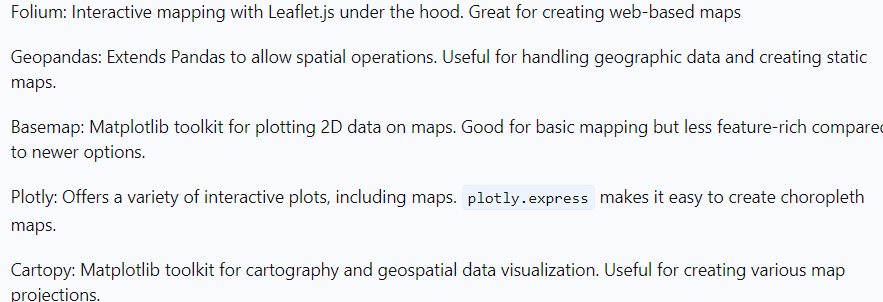

## Dataset Loading

In [2312]:
Belga_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_BELGA_withFuelData.csv"
Deocareza_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_DEOCAREZA_withFuelData.csv"
Graceda_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_GRACEDA_withFuelData.csv"
Manuel_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_MANUEL_withFuelData.csv"
Paralde_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_PARALDE_withFuelData.csv"

Carmelotes_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_CARMELOTES_withFuelData.csv"
Escuerdo_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_ESCUERDO_withFuelData.csv"
Graceda_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_GRACEDA_withFuelData.csv"
Neri_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_NERI_withFuelData.csv"
Ostan_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_OSTAN_withFuelData.csv"

Bajaro_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_BAJARO.csv"
Escuerdo_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_ESCUERDO_withFuelData.csv"
Graceda_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_GRACEDA_withFuelData.csv"
Neri_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_NERI_withFuelData.csv"
Ostan_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_OSTAN_withFuelData.csv"

Belga_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_BELGA_withFuelData.csv"
Caralde_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_CARALDE_withFuelData.csv"

Arangco_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_ARANGCO.csv"
Ceballos_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_CEBALLOS.csv"
Delosreyes_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_DELOSREYES.csv"
Fontillas_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_FONTILLAS_withFuelData.csv"
Lina_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_LINA.csv"
Neri_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_NERI_withFuelData.csv"

Arango_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_ARANGO.csv"
Bolata_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_BOLATA.csv"
Gipa_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_GIPA.csv"
Loy_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_LOY.csv"
Porquez_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_PORQUEZ.csv"

Arango_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_ARANGO.csv"
Gipa_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_GIPA.csv"
Ubusan_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_UBUSAN.csv"

Delos_Reyes_0728_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0728_Delos_Reyes.csv"

In [2313]:
'''df_1 = pd.read_csv('belga_0711.csv')
df_1['bus_dispatched'] = 3;
df_2 = pd.read_csv('deocareza_0711.csv')
df_2['bus_dispatched'] = 1
df_3 = pd.read_csv('graceda_0711.csv')
df_3['bus_dispatched'] = 2;
df_4 = pd.read_csv('manuel_0711.csv')
df_4['bus_dispatched'] = 4;
df_5 = pd.read_csv(Paralde_0711_url)
df_5['bus_dispatched'] = 5;

df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)'''

"df_1 = pd.read_csv('belga_0711.csv')\ndf_1['bus_dispatched'] = 3;\ndf_2 = pd.read_csv('deocareza_0711.csv')\ndf_2['bus_dispatched'] = 1\ndf_3 = pd.read_csv('graceda_0711.csv')\ndf_3['bus_dispatched'] = 2;\ndf_4 = pd.read_csv('manuel_0711.csv')\ndf_4['bus_dispatched'] = 4;\ndf_5 = pd.read_csv(Paralde_0711_url)\ndf_5['bus_dispatched'] = 5;\n\ndf = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)"

In [2314]:
'''df_1 = pd.read_csv('graceda_0712.csv')
df_1['bus_dispatched'] = 6;
df_2 = pd.read_csv('neri_0712.csv')
df_2['bus_dispatched'] =10;
df_3 = pd.read_csv('ostan_0712.csv')
df_3['bus_dispatched'] = 8;
df_4 = pd.read_csv('carmelotes_0711.csv')
df_4['bus_dispatched'] = 9;
df_5 = pd.read_csv('escuerdos_0712.csv')
df_5['bus_dispatched'] = 7;

df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)'''

"df_1 = pd.read_csv('graceda_0712.csv')\ndf_1['bus_dispatched'] = 6;\ndf_2 = pd.read_csv('neri_0712.csv')\ndf_2['bus_dispatched'] =10;\ndf_3 = pd.read_csv('ostan_0712.csv')\ndf_3['bus_dispatched'] = 8;\ndf_4 = pd.read_csv('carmelotes_0711.csv')\ndf_4['bus_dispatched'] = 9;\ndf_5 = pd.read_csv('escuerdos_0712.csv')\ndf_5['bus_dispatched'] = 7;\n\ndf = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)"

In [2315]:
'''df_1 = pd.read_csv('escuerdos_0713.csv')
df_1['bus_dispatched'] = 14;
df_2 = pd.read_csv('neri_0713.csv')
df_2['bus_dispatched'] =13;
df_3 = pd.read_csv('ostan_0713.csv')
df_3['bus_dispatched'] = 12;
df_4 = pd.read_csv('graceda_0713.csv')
df_4['bus_dispatched'] = 11;
df_5 = pd.read_csv('bajaro_0713.csv')
df_5['bus_dispatched'] = 15;

df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)'''

"df_1 = pd.read_csv('escuerdos_0713.csv')\ndf_1['bus_dispatched'] = 14;\ndf_2 = pd.read_csv('neri_0713.csv')\ndf_2['bus_dispatched'] =13;\ndf_3 = pd.read_csv('ostan_0713.csv')\ndf_3['bus_dispatched'] = 12;\ndf_4 = pd.read_csv('graceda_0713.csv')\ndf_4['bus_dispatched'] = 11;\ndf_5 = pd.read_csv('bajaro_0713.csv')\ndf_5['bus_dispatched'] = 15;\n\ndf = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)"

In [2316]:
'''df_1 = pd.read_csv('belga_0717.csv')
df_1['bus_dispatched'] = 17;
df_2 = pd.read_csv('caralde_0717.csv')
df_2['bus_dispatched'] =16;

df = pd.concat([df_1, df_2], ignore_index=True)'''

"df_1 = pd.read_csv('belga_0717.csv')\ndf_1['bus_dispatched'] = 17;\ndf_2 = pd.read_csv('caralde_0717.csv')\ndf_2['bus_dispatched'] =16;\n\ndf = pd.concat([df_1, df_2], ignore_index=True)"

In [2317]:
df_1 = pd.read_csv('arangco_0718.csv')
df_1['bus_dispatched'] = 23;
df_2 = pd.read_csv('neri_0718.csv')
df_2['bus_dispatched'] =18;
df_3 = pd.read_csv('lina_0718.csv')
df_3['bus_dispatched'] = 20;
df_4 = pd.read_csv('fontillas_0718.csv')
df_4['bus_dispatched'] = 19;
df_5 = pd.read_csv('delosreyes_0718.csv')
df_5['bus_dispatched'] = 21;
df_6 = pd.read_csv('ceballos_0718.csv')
df_6['bus_dispatched'] = 22;

df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6], ignore_index=True)

In [2318]:
# df = pd.read_csv(Neri_0718_url)

In [2319]:
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers,bus_dispatched
258975,121.056198,14.585968,2023-07-18 18:53:19,0,0,22.0,18.0,53.0,19.0,1,6,10.833222,10.941577,0.000000,0.000000,Northbound,9,0,22
16448,121.014082,14.657468,2023-07-18 19:15:09,0,0,21.0,19.0,15.0,9.0,1,20,2.857864,16.507461,0.000000,0.000000,Southbound,3,0,23
28427,121.045435,14.566307,2023-07-18 22:53:32,0,0,34.0,22.0,53.0,32.0,1,15,11.874563,8.539803,0.000000,0.000000,Southbound,9,0,23
178967,120.991515,14.509750,2023-07-18 08:30:18,0,0,22.0,8.0,30.0,18.0,1,0,16.402307,0.145561,0.009762,0.001208,Southbound,5,0,21
35387,121.052720,14.616552,2023-07-18 05:46:21,0,0,43.0,5.0,46.0,21.0,1,16,8.345521,13.528368,-0.009284,0.008624,Northbound,8,0,18
38079,120.998047,14.657292,2023-07-18 06:28:47,0,0,45.0,6.0,28.0,47.0,1,12,1.132771,16.313513,0.002866,0.000695,Southbound,4,0,18
198410,121.047212,14.628353,2023-07-18 14:15:27,0,0,6.0,14.0,15.0,27.0,1,1,7.179062,14.423711,-0.001063,0.000952,Northbound,3,0,21
183399,121.033638,14.650535,2023-07-18 09:50:23,0,0,6.0,9.0,50.0,23.0,1,18,5.016822,16.216648,0.000000,0.000000,Northbound,9,0,21
43122,120.990227,14.508072,2023-07-18 07:50:39,0,0,7.0,7.0,50.0,39.0,1,5,16.585857,0.301874,-0.007198,-0.007389,Northbound,9,0,18
251667,121.028560,14.550428,2023-07-18 16:30:12,0,1,12.0,16.0,30.0,12.0,1,10,12.668168,6.009357,0.000000,0.000000,Northbound,5,0,22


In [2320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273710 entries, 0 to 273709
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   longitude                 273710 non-null  float64
 1   latitude                  273710 non-null  float64
 2   timestamp                 273710 non-null  object 
 3   Board                     273710 non-null  int64  
 4   Alight                    273710 non-null  int64  
 5   Numpass                   273710 non-null  float64
 6   Hour                      273710 non-null  float64
 7   Min                       273710 non-null  float64
 8   Sec                       273710 non-null  float64
 9   Day_of_week               273710 non-null  int64  
 10  stop_cluster              273710 non-null  int64  
 11  distance_from_cluster_0   273710 non-null  float64
 12  distance_from_cluster_18  273710 non-null  float64
 13  dist_change_cluster_0     273704 non-null  f

In [2321]:
df.describe()

,longitude,latitude,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,QuarterHour,waiting_passengers,bus_dispatched
count,273710.000000,273710.000000,273710.000000,273710.000000,273710.000000,273710.000000,273710.000000,273710.00000,273710.0,273710.000000,273710.000000,273710.000000,273704.000000,273704.000000,273710.000000,273710.000000,273710.000000
mean,121.016333,14.581112,0.013251,0.011618,22.406850,13.914475,29.564777,29.51008,1.0,9.545819,9.945480,8.637982,-0.000056,0.000059,4.587713,0.104808,20.272321
std,0.024714,0.053689,0.114349,0.107160,15.821903,4.957288,17.237713,17.29871,0.0,5.792346,5.000763,6.078352,0.006888,0.008038,3.318507,1.134285,1.698951
min,120.983417,14.502725,0.000000,0.000000,0.000000,4.000000,0.000000,0.00000,1.0,0.000000,0.001136,0.003593,-1.177324,-0.610084,0.000000,0.000000,18.000000
25%,120.991402,14.537174,0.000000,0.000000,11.000000,10.000000,15.000000,15.00000,1.0,5.000000,5.773556,2.946277,0.000000,0.000000,2.000000,0.000000,19.000000
50%,121.011595,14.561836,0.000000,0.000000,20.000000,14.000000,30.000000,30.00000,1.0,9.000000,12.171818,8.003961,0.000000,0.000000,5.000000,0.000000,20.000000
75%,121.039077,14.641965,0.000000,0.000000,32.000000,18.000000,44.000000,44.00000,1.0,15.000000,13.397568,15.494178,0.000000,0.000000,7.000000,0.000000,22.000000
max,121.059912,14.657983,1.000000,1.000000,84.000000,23.000000,59.000000,59.00000,1.0,20.000000,17.178191,16.691737,0.436206,0.950530,10.000000,30.000000,23.000000


In [2322]:
df.isnull().sum()

,0
longitude,0
latitude,0
timestamp,0
Board,0
Alight,0
Numpass,0
Hour,0
Min,0
Sec,0
Day_of_week,0


In [2323]:
df.duplicated().sum()

0

## Data Cleaning Pipeline

### Commuter Demand Data
Time-based Features: Hour, Min, Sec, Timestamp, Date, Day of the week

Location-based Features: Longitude, latitude

Passenger data: Board, Alight, Numpass

In [2324]:
#cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec', 'bus_dispatched']
cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec']

In [2325]:
'''df.drop(columns = ['id', 'timeStamp','altitude', 'calEngineLoad', 'gpsSpeed',
                   'calEngineLoad', 'vehSpeed', 'throttlePosition', 'ambientAirTemp',
                   'Speed', 'fuelPressure','engineRPM', 'engineOilTemp',
                   'distanceTravelled', 'abdFuelRailTemp', 'fuelInjectionTiming',
                   'engineFuelRate', 'tripOdometer', 'Driver', 'Deviceid',
                   'Userid', 'Withpass', 'Withevent', 'Cumpass', 'Altitude',
                   'Accuracy', 'Feedno', 'Pass', 'Date',], inplace = True)'''

"df.drop(columns = ['id', 'timeStamp','altitude', 'calEngineLoad', 'gpsSpeed',\n                   'calEngineLoad', 'vehSpeed', 'throttlePosition', 'ambientAirTemp',\n                   'Speed', 'fuelPressure','engineRPM', 'engineOilTemp',\n                   'distanceTravelled', 'abdFuelRailTemp', 'fuelInjectionTiming',\n                   'engineFuelRate', 'tripOdometer', 'Driver', 'Deviceid',\n                   'Userid', 'Withpass', 'Withevent', 'Cumpass', 'Altitude',\n                   'Accuracy', 'Feedno', 'Pass', 'Date',], inplace = True)"

In [2326]:
df = df[cols]

In [2327]:
df[(df['Alight'] == True) & (df['Board'] == True)]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec


In [2328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273710 entries, 0 to 273709
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   longitude  273710 non-null  float64
 1   latitude   273710 non-null  float64
 2   timestamp  273710 non-null  object 
 3   Board      273710 non-null  int64  
 4   Alight     273710 non-null  int64  
 5   Numpass    273710 non-null  float64
 6   Hour       273710 non-null  float64
 7   Min        273710 non-null  float64
 8   Sec        273710 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 18.8+ MB


In [2329]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Hour'] = df['timestamp'].dt.hour
df['Min'] = df['timestamp'].dt.minute
df['Sec'] = df['timestamp'].dt.second
df['Time'] = df['timestamp'].dt.time
df['datePH'] = df['timestamp'].dt.date
df['Day_of_week'] = df['timestamp'].dt.dayofweek

In [2330]:
df['Board'].ffill(inplace = True)
df['Alight'].ffill(inplace = True)
df['Numpass'].ffill(inplace = True)

In [2331]:
df.isna().sum()

,0
longitude,0
latitude,0
timestamp,0
Board,0
Alight,0
Numpass,0
Hour,0
Min,0
Sec,0
Time,0


In [2332]:
df.duplicated().sum()

0

In [2333]:
df.dropna(inplace = True)

In [2334]:
df.drop_duplicates(inplace = True)

In [2335]:
from sklearn.cluster import KMeans

# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns
kmeans = KMeans(n_clusters=21, random_state=42)  # Choose a reasonable number of clusters
df['stop_cluster'] = kmeans.fit_predict(df[['longitude', 'latitude']])

In [2336]:
df[df['Board']==True]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Time,datePH,Day_of_week,stop_cluster
850,120.987212,14.657148,2023-07-18 14:33:02,1,0,1.0,14,33,2,14:33:02,2023-07-18,1,10
852,120.987212,14.657148,2023-07-18 14:33:03,1,0,2.0,14,33,3,14:33:03,2023-07-18,1,10
857,120.987212,14.657148,2023-07-18 14:33:07,1,0,4.0,14,33,7,14:33:07,2023-07-18,1,10
860,120.987212,14.657148,2023-07-18 14:33:09,1,0,6.0,14,33,9,14:33:09,2023-07-18,1,10
862,120.987212,14.657148,2023-07-18 14:33:10,1,0,8.0,14,33,10,14:33:10,2023-07-18,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272507,121.046953,14.628692,2023-07-18 23:34:35,1,0,23.0,23,34,35,23:34:35,2023-07-18,1,13
272878,121.032862,14.651373,2023-07-18 23:41:34,1,0,20.0,23,41,34,23:41:34,2023-07-18,1,14
272889,121.032793,14.651305,2023-07-18 23:41:45,1,0,21.0,23,41,45,23:41:45,2023-07-18,1,14
272906,121.032793,14.651305,2023-07-18 23:42:02,1,0,22.0,23,42,2,23:42:02,2023-07-18,1,14


In [2337]:
df['Board'] = df['Board'].astype(int)
df['Alight'] = df['Alight'].astype(int)

In [2338]:
df.drop(columns = ['Time', 'datePH'], inplace = True)

In [2339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273710 entries, 0 to 273709
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   longitude     273710 non-null  float64       
 1   latitude      273710 non-null  float64       
 2   timestamp     273710 non-null  datetime64[ns]
 3   Board         273710 non-null  int64         
 4   Alight        273710 non-null  int64         
 5   Numpass       273710 non-null  float64       
 6   Hour          273710 non-null  int32         
 7   Min           273710 non-null  int32         
 8   Sec           273710 non-null  int32         
 9   Day_of_week   273710 non-null  int32         
 10  stop_cluster  273710 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(5), int64(2)
memory usage: 17.8 MB


In [2340]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth
    (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = [np.radians(coord) for coord in [lat1, lon1, lat2, lon2]]

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r


In [2341]:
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

Cluster 0: [120.99942044  14.65729876]
Cluster 1: [120.99932813  14.53762985]
Cluster 2: [121.05880213  14.59976962]
Cluster 3: [121.04601773  14.5681956 ]
Cluster 4: [121.03951436  14.64111322]
Cluster 5: [120.9910038   14.51069618]
Cluster 6: [121.02877301  14.54993051]
Cluster 7: [121.05365165  14.61382756]
Cluster 8: [121.02141676  14.65733631]
Cluster 9: [120.98975321  14.52999187]
Cluster 10: [120.98719624  14.65718031]
Cluster 11: [121.05560681  14.58519894]
Cluster 12: [121.00812084  14.53855632]
Cluster 13: [121.04709324  14.62811594]
Cluster 14: [121.03250973  14.65167414]
Cluster 15: [120.99087406  14.53628714]
Cluster 16: [121.03614802  14.5559227 ]
Cluster 17: [120.98427226  14.53528891]
Cluster 18: [120.99064703  14.52101908]
Cluster 19: [121.01177552  14.65753669]
Cluster 20: [121.01992739  14.54262265]


In [2342]:
df['Day_of_week'] = df['timestamp'].dt.weekday

In [2343]:
df.head()

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster
0,120.984515,14.657063,2023-07-18 14:15:48,0,0,0.0,14,15,48,1,10
1,120.984515,14.657063,2023-07-18 14:15:49,0,0,0.0,14,15,49,1,10
2,120.984515,14.657063,2023-07-18 14:15:50,0,0,0.0,14,15,50,1,10
3,120.984515,14.657063,2023-07-18 14:15:51,0,0,0.0,14,15,51,1,10
4,120.984515,14.657063,2023-07-18 14:15:52,0,0,0.0,14,15,52,1,10


In [2344]:
# Define the coordinates for the end clusters (example values)
northmost_coords = (14.65720874, 120.98751702)  # Example coordinates for cluster 0 (northmost terminal)
southmost_coords = (14.51075543, 120.99064908)  # Example coordinates for cluster 18 (southmost terminal)

def calculate_distance_from_terminals(df):
    """
    Calculates the distance of each bus stop from the two end terminals (cluster 0 and cluster 18).
    Adds columns for distance_from_cluster_0 and distance_from_cluster_18.

    Args:
    - df: DataFrame with latitude and longitude columns

    Returns:
    - DataFrame with added 'distance_from_cluster_0' and 'distance_from_cluster_18' columns
    """
    # Calculate distances from cluster 0 (northmost terminal)
    df['distance_from_cluster_0'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], northmost_coords[0], northmost_coords[1]), axis=1)

    # Calculate distances from cluster 18 (southmost terminal)
    df['distance_from_cluster_18'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], southmost_coords[0], southmost_coords[1]), axis=1)

    return df

In [2345]:
df = calculate_distance_from_terminals(df)

In [2346]:
def determine_direction_based_on_terminals(df):
    """
    Determines the bus direction (Northbound or Southbound) based on the proximity
    of the bus to the end terminals (clusters 0 and 18). If the bus is moving closer to
    cluster 0, it's Northbound; if it's moving closer to cluster 18, it's Southbound.

    Args:
    - df: DataFrame that contains 'distance_from_cluster_0' and 'distance_from_cluster_18' columns

    Returns:
    - DataFrame with a 'direction' column
    """
    # Calculate the difference in distance between consecutive rows to determine direction
    df['dist_change_cluster_0'] = df['distance_from_cluster_0'].diff()
    df['dist_change_cluster_18'] = df['distance_from_cluster_18'].diff()

    # Determine direction based on the distance change
    df['direction'] = df.apply(lambda row: 'Northbound' if row['dist_change_cluster_0'] < 0 else 'Southbound' if row['dist_change_cluster_18'] < 0 else None, axis=1)

    # Forward fill to propagate the last known direction when stationary
    df['direction'] = df['direction'].ffill()
    df['direction'] = df['direction'].bfill()

    return df

In [2347]:
df = determine_direction_based_on_terminals(df)
df

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction
0,120.984515,14.657063,2023-07-18 14:15:48,0,0,0.0,14,15,48,1,10,0.323351,16.282079,NaN,NaN,Northbound
1,120.984515,14.657063,2023-07-18 14:15:49,0,0,0.0,14,15,49,1,10,0.323351,16.282079,0.000000,0.000000,Northbound
2,120.984515,14.657063,2023-07-18 14:15:50,0,0,0.0,14,15,50,1,10,0.323351,16.282079,0.000000,0.000000,Northbound
3,120.984515,14.657063,2023-07-18 14:15:51,0,0,0.0,14,15,51,1,10,0.323351,16.282079,0.000000,0.000000,Northbound
4,120.984515,14.657063,2023-07-18 14:15:52,0,0,0.0,14,15,52,1,10,0.323351,16.282079,0.000000,0.000000,Northbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273705,120.985345,14.657323,2023-07-18 23:56:12,0,0,0.0,23,56,12,1,10,0.234005,16.307596,0.003030,-0.000071,Southbound
273706,120.985315,14.657320,2023-07-18 23:56:13,0,0,0.0,23,56,13,1,10,0.237208,16.307342,0.003203,-0.000253,Southbound
273707,120.985288,14.657318,2023-07-18 23:56:14,0,0,0.0,23,56,14,1,10,0.240067,16.307255,0.002859,-0.000088,Southbound
273708,120.985257,14.657313,2023-07-18 23:56:15,0,0,0.0,23,56,15,1,10,0.243445,16.306820,0.003379,-0.000435,Southbound


In [2348]:
def assign_quarter_hour(df):
    """
    Assigns a quarter-hour interval for each row based on the 'Min' (minute) column.
    Divides the 60-minute hour into 15-minute chunks.

    Args:
    - df: DataFrame that contains the 'Min' (minute) column

    Returns:
    - DataFrame with an additional 'QuarterHour' column
    """
    # Define which quarter of the hour the minute falls into
    conditions = [
        (df['Min'] < 5),
        (df['Min'] >= 5) & (df['Min'] < 10),
        (df['Min'] >= 10) & (df['Min'] < 15),
        (df['Min'] >= 15) & (df['Min'] < 20),
        (df['Min'] >= 25) & (df['Min'] < 30),
        (df['Min'] >= 30) & (df['Min'] < 35),
        (df['Min'] >= 35) & (df['Min'] < 40),
        (df['Min'] >= 40) & (df['Min'] < 45),
        (df['Min'] >= 45) & (df['Min'] < 50),
        (df['Min'] >= 50) & (df['Min'] < 55),
        (df['Min'] >= 55)
    ]
    values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Create a new column for QuarterHour
    df['QuarterHour'] = np.select(conditions, values)

    return df


In [2349]:
df = assign_quarter_hour(df)
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour
26952,121.028948,14.550503,2023-07-18 22:25:57,0,0,34.0,22,25,57,1,6,12.674991,6.043919,0.000000,0.000000,Northbound,4
257942,121.034780,14.554533,2023-07-18 18:35:41,0,0,20.0,18,35,41,1,16,12.498419,6.801460,0.000000,0.000000,Northbound,6
231885,121.033452,14.650823,2023-07-18 10:07:59,0,0,28.0,10,7,59,1,14,4.992294,16.241676,-0.000872,0.000862,Northbound,1
211220,121.034610,14.554393,2023-07-18 18:22:30,0,0,13.0,18,22,30,1,16,12.505223,6.777548,0.000000,0.000000,Northbound,0
64802,120.994103,14.657238,2023-07-18 14:20:55,0,0,18.0,14,20,55,1,0,0.708535,16.292393,0.002334,0.000053,Southbound,0
16608,121.021087,14.657433,2023-07-18 19:17:45,0,0,28.0,19,17,45,1,8,3.611376,16.635482,0.011095,-0.000181,Southbound,3
79685,121.014500,14.657658,2023-07-18 18:24:35,0,0,76.0,18,24,35,1,19,2.903157,16.535269,-0.003915,0.000673,Northbound,0
136644,120.997222,14.657140,2023-07-18 11:28:22,0,0,24.0,11,28,22,1,0,1.044011,16.292581,0.000000,0.000000,Southbound,4
76014,120.999712,14.537515,2023-07-18 17:26:10,0,0,10.0,17,26,10,1,1,13.373867,3.131353,0.000298,0.000948,Northbound,4
211431,121.037875,14.557132,2023-07-18 18:26:01,0,0,13.0,18,26,1,1,16,12.377182,7.240975,0.000593,0.002532,Northbound,4


In [2350]:
def add_boarding_counts_per_cluster(df):
    """
    Adds a single column 'waiting_passengers' that records the number of passengers waiting to board
    at each stop cluster, depending on the direction (northbound or southbound), at each quarter-hour.

    Args:
    - df: DataFrame that contains the columns 'stop_cluster', 'QuarterHour', 'Board', 'direction'

    Returns:
    - DataFrame with the additional 'waiting_passengers' column
    """
    # Initialize the waiting passengers column
    df['waiting_passengers'] = 0

    # Group by stop_cluster, direction, Hour, and QuarterHour to calculate waiting passengers per group
    for name, group in df.groupby(['stop_cluster', 'direction', 'Hour', 'QuarterHour']):
        # Count the number of passengers boarding in this group
        waiting_count = (group['Board'] == True).sum()

        # Assign the count to the 'waiting_passengers' column for the entire group
        df.loc[group.index, 'waiting_passengers'] = waiting_count

    return df

In [2351]:
df = add_boarding_counts_per_cluster(df)

In [2352]:
def update_waiting_passengers_cumulatively(df):
    """
    Updates the 'waiting_passengers' column to subtract one from the cumulative count
    when a passenger boards at a specific stop cluster and direction.

    Args:
    - df: DataFrame that contains the columns 'stop_cluster', 'Board', 'waiting_passengers', 'direction'

    Returns:
    - DataFrame with updated 'waiting_passengers' column
    """
    # Initialize a dictionary to keep track of cumulative waiting passengers for each (stop_cluster, direction) pair
    cumulative_waiting = {}

    for idx, row in df.iterrows():
        cluster = row['stop_cluster']
        direction = row['direction']

        # Create a unique key based on stop_cluster and direction
        key = (cluster, direction)

        # Initialize the waiting passenger count for this (stop_cluster, direction) pair if not already done
        if key not in cumulative_waiting:
            cumulative_waiting[key] = row['waiting_passengers']

        # If a passenger boards (Board == True), decrease the count for this (stop_cluster, direction)
        if row['Board']:
            cumulative_waiting[key] = max(0, cumulative_waiting[key] - 1)

        # Update the waiting_passengers column in the dataframe
        df.at[idx, 'waiting_passengers'] = cumulative_waiting[key]

    return df

In [2354]:
# Example usage: Adjust waiting passengers after boarding cumulatively
df = update_waiting_passengers_cumulatively(df)

In [2355]:
df.head()

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
0,120.984515,14.657063,2023-07-18 14:15:48,0,0,0.0,14,15,48,1,10,0.323351,16.282079,NaN,NaN,Northbound,3,18
1,120.984515,14.657063,2023-07-18 14:15:49,0,0,0.0,14,15,49,1,10,0.323351,16.282079,0.0,0.0,Northbound,3,18
2,120.984515,14.657063,2023-07-18 14:15:50,0,0,0.0,14,15,50,1,10,0.323351,16.282079,0.0,0.0,Northbound,3,18
3,120.984515,14.657063,2023-07-18 14:15:51,0,0,0.0,14,15,51,1,10,0.323351,16.282079,0.0,0.0,Northbound,3,18
4,120.984515,14.657063,2023-07-18 14:15:52,0,0,0.0,14,15,52,1,10,0.323351,16.282079,0.0,0.0,Northbound,3,18


In [2356]:
df[df['Board'] == 1].sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
251717,121.028560,14.550428,2023-07-18 16:31:02,1,0,29.0,16,31,2,1,6,12.668168,6.009357,0.0,0.0,Northbound,5,0
204451,121.028267,14.550342,2023-07-18 16:15:45,1,0,38.0,16,15,45,1,6,12.666245,5.980866,0.0,0.0,Northbound,3,0
64655,120.987163,14.657183,2023-07-18 14:18:44,1,0,3.0,14,18,44,1,10,0.038157,16.286357,0.0,0.0,Northbound,3,0
266591,121.028320,14.550098,2023-07-18 21:31:57,1,0,36.0,21,31,57,1,6,12.693613,5.964883,0.0,0.0,Northbound,5,0
142186,120.991757,14.511587,2023-07-18 13:47:13,1,0,11.0,13,47,13,1,5,16.198869,0.150850,0.0,0.0,Northbound,8,0
62223,121.032978,14.651533,2023-07-18 13:38:59,1,0,37.0,13,38,59,1,14,4.931169,16.303092,0.0,0.0,Southbound,6,0
55284,120.998828,14.537710,2023-07-18 11:10:47,1,0,16.0,11,10,47,1,1,13.343283,3.123847,0.0,0.0,Southbound,2,0
139396,121.045903,14.568500,2023-07-18 12:14:16,1,0,32.0,12,14,16,1,3,11.694641,8.751989,0.0,0.0,Northbound,2,0
222025,120.988913,14.535578,2023-07-18 21:26:59,1,0,13.0,21,26,59,1,15,13.525522,2.766494,0.0,0.0,Southbound,4,0
115427,120.997257,14.657390,2023-07-18 14:02:10,1,0,20.0,14,2,10,1,0,1.047941,16.320517,0.0,0.0,Northbound,0,0


In [2357]:
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
54738,121.004805,14.538148,2023-07-18 11:01:51,0,0,16.0,11,1,51,1,12,13.368978,3.405825,0.000253,-0.002179,Southbound,0,0
10456,120.998788,14.537503,2023-07-18 17:29:04,0,0,15.0,17,29,4,1,1,13.365780,3.100582,0.000227,0.000708,Northbound,4,0
258377,121.045382,14.565963,2023-07-18 18:42:56,0,0,24.0,18,42,56,1,3,11.904070,8.508255,-0.010076,0.013407,Northbound,7,0
117414,121.028610,14.549592,2023-07-18 06:08:23,0,0,25.0,6,8,23,1,6,12.757280,5.945106,0.000000,0.000000,Northbound,1,0
74015,120.990972,14.520212,2023-07-18 16:53:02,0,0,7.0,16,53,2,1,18,15.237922,1.052051,-0.010923,0.010931,Northbound,9,0
244880,121.053625,14.613977,2023-07-18 14:20:44,0,0,20.0,14,20,44,1,7,8.584561,13.329416,0.000000,0.000000,Northbound,0,0
208787,120.989257,14.536322,2023-07-18 17:31:04,0,0,8.0,17,31,4,1,15,13.443340,2.846777,0.000196,-0.000217,Southbound,5,0
118361,121.056502,14.586782,2023-07-18 06:24:02,0,0,40.0,6,24,2,1,11,10.789683,11.031792,0.000244,0.000228,Northbound,0,0
215930,121.019620,14.657577,2023-07-18 19:43:01,0,0,43.0,19,43,1,1,8,3.453759,16.620779,0.000000,0.000000,Southbound,7,0
216232,121.032673,14.650943,2023-07-18 19:47:59,0,0,37.0,19,47,59,1,14,4.907519,16.230936,0.000000,0.000000,Southbound,8,0


In [2358]:
# df.to_csv('neri_0718.csv', index=False)
df.to_csv('summary_0718.csv', index=False)

In [2359]:
df[df['Numpass'] == 0]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
0,120.984515,14.657063,2023-07-18 14:15:48,0,0,0.0,14,15,48,1,10,0.323351,16.282079,NaN,NaN,Northbound,3,18
1,120.984515,14.657063,2023-07-18 14:15:49,0,0,0.0,14,15,49,1,10,0.323351,16.282079,0.000000,0.000000,Northbound,3,18
2,120.984515,14.657063,2023-07-18 14:15:50,0,0,0.0,14,15,50,1,10,0.323351,16.282079,0.000000,0.000000,Northbound,3,18
3,120.984515,14.657063,2023-07-18 14:15:51,0,0,0.0,14,15,51,1,10,0.323351,16.282079,0.000000,0.000000,Northbound,3,18
4,120.984515,14.657063,2023-07-18 14:15:52,0,0,0.0,14,15,52,1,10,0.323351,16.282079,0.000000,0.000000,Northbound,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273705,120.985345,14.657323,2023-07-18 23:56:12,0,0,0.0,23,56,12,1,10,0.234005,16.307596,0.003030,-0.000071,Southbound,10,0
273706,120.985315,14.657320,2023-07-18 23:56:13,0,0,0.0,23,56,13,1,10,0.237208,16.307342,0.003203,-0.000253,Southbound,10,0
273707,120.985288,14.657318,2023-07-18 23:56:14,0,0,0.0,23,56,14,1,10,0.240067,16.307255,0.002859,-0.000088,Southbound,10,0
273708,120.985257,14.657313,2023-07-18 23:56:15,0,0,0.0,23,56,15,1,10,0.243445,16.306820,0.003379,-0.000435,Southbound,10,0


In [2360]:
df[(df['Board'] == 1) & (df['Hour'] == 6)]['stop_cluster'].value_counts()

,count
stop_cluster,
0,66
7,43
4,42
8,40
10,31
13,30
14,29
3,25
11,23


# Data Visualization

### Plot number of boarding passengers per cluster at a given hour range

In [2361]:
df_4_6 = df[(df['Hour'] >= 4) & (df['Hour'] <= 6)]
df_4_6 = df_4_6[df_4_6['Board'] == 1]
df_4_6['stop_cluster'].value_counts()

df[df['Board'] == 1]['stop_cluster'].value_counts()

,count
stop_cluster,
6,473
5,374
10,316
11,268
0,254
7,233
8,233
1,232
14,226


In [2362]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime, FastMarkerCluster, MarkerCluster

In [2363]:
map_center = [df_4_6['latitude'].mean(), df_4_6['longitude'].mean()]
print(map_center)
map = folium.Map(location=map_center, zoom_start=12)
cluster_map = folium.Map(location=map_center, zoom_start=12)

latitudes = df_4_6['latitude'].tolist()
longitudes = df_4_6['longitude'].tolist()

[14.602912811317568, 121.02007978648649]


In [2364]:
'''FastMarkerCluster(data=list(zip(latitudes, longitudes))).add_to(cluster_map)'''
marker_cluster = MarkerCluster().add_to(cluster_map)
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(marker_cluster)

cluster_map

In [2365]:
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(map)
map

In [2366]:
#Waiting Time
#Overcrowding (Heuristic)

In [2367]:
df['direction'] = df['direction'].replace({'Northbound': 1, 'Southbound': 0})

In [2368]:
df.corr()['waiting_passengers'].abs().sort_values(ascending=False)

,waiting_passengers
waiting_passengers,1.000000
distance_from_cluster_0,0.126526
Numpass,0.090904
latitude,0.089667
distance_from_cluster_18,0.082277
longitude,0.068309
direction,0.031647
Hour,0.028645
timestamp,0.028371
QuarterHour,0.010246


## Model training

In [2369]:
df.dropna(inplace = True)

In [2370]:
X = df[['Hour', 'Min', 'direction', 'Day_of_week', 'stop_cluster']]
y = df['waiting_passengers']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2371]:
# XGBoost Regression Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [2372]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [2373]:
# Predictions
rf_preds = rf_model.predict(X_test)
xg_preds = xg_model.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model.score(X_test, y_test))
print(xg_model.score(X_test, y_test))

Random Forest RMSE: 0.49753857879999297
XGBoost RMSE: 0.5282707871106632
0.8502795265744503
0.8312123417854309


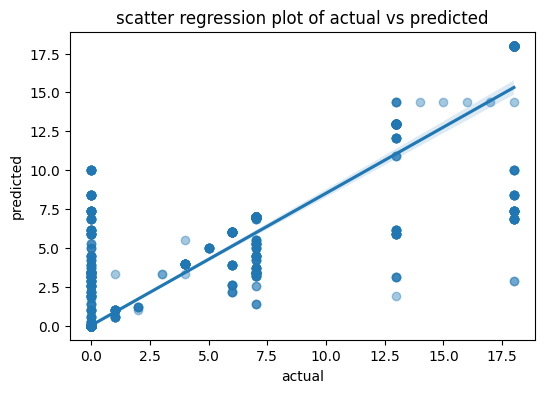

In [2374]:
# Plot real vs predicted values
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=rf_preds, data=df, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Model Testing

In [2375]:
df[(df['Board'] == 1) & (df['Hour'] == 4) & (df['direction'] == 1) & (df['Min'] == 15)]['stop_cluster'].value_counts()

,count
stop_cluster,


In [2376]:
X = df[['Hour', 'Min', 'direction', 'Day_of_week', 'stop_cluster']]

In [2377]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, rf_model.predict([[i, j, 1, 1, 0]]))

4 0 1 [0.]
4 1 1 [0.]
4 2 1 [0.]
4 3 1 [0.]
4 4 1 [0.]
4 5 1 [0.]
4 6 1 [0.]
4 7 1 [0.]
4 8 1 [0.]
4 9 1 [0.]
4 10 1 [0.]
4 11 1 [0.]
4 12 1 [0.]
4 13 1 [0.]
4 14 1 [0.]
4 15 1 [0.]
4 16 1 [0.]
4 17 1 [0.]
4 18 1 [0.]
4 19 1 [0.]
4 20 1 [0.]
4 21 1 [0.]
4 22 1 [0.]
4 23 1 [0.]
4 24 1 [0.]
4 25 1 [0.]
4 26 1 [0.]
4 27 1 [0.]
4 28 1 [0.]
4 29 1 [0.]
4 30 1 [0.]
4 31 1 [0.]
4 32 1 [0.]
4 33 1 [0.]
4 34 1 [0.]
4 35 1 [0.]
4 36 1 [0.]
4 37 1 [0.]
4 38 1 [0.]
4 39 1 [0.]
4 40 1 [0.]
4 41 1 [0.]
4 42 1 [0.]
4 43 1 [0.]
4 44 1 [0.]
4 45 1 [0.]
4 46 1 [0.]
4 47 1 [0.]
4 48 1 [0.]
4 49 1 [0.]
4 50 1 [0.]
4 51 1 [0.]
4 52 1 [0.]
4 53 1 [0.]
4 54 1 [0.]
4 55 1 [0.]
4 56 1 [0.]
4 57 1 [0.]
4 58 1 [0.]
4 59 1 [0.]
5 0 1 [0.]
5 1 1 [0.]
5 2 1 [0.]
5 3 1 [0.]
5 4 1 [0.]
5 5 1 [0.]
5 6 1 [0.]
5 7 1 [0.]
5 8 1 [0.]
5 9 1 [0.]
5 10 1 [0.]
5 11 1 [0.]
5 12 1 [0.]
5 13 1 [0.]
5 14 1 [0.]
5 15 1 [0.]
5 16 1 [0.]
5 17 1 [0.]
5 18 1 [0.]
5 19 1 [0.]
5 20 1 [0.]
5 21 1 [0.]
5 22 1 [0.]
5 23 1 [0.]
5 24 1 [0.]


In [2378]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, xg_model.predict([[i, j, 1, 1, 10]]))

4 0 1 [0.4214449]
4 1 1 [0.4214449]
4 2 1 [1.8349916]
4 3 1 [2.3057315]
4 4 1 [2.3464706]
4 5 1 [2.522689]
4 6 1 [4.1701813]
4 7 1 [5.190711]
4 8 1 [3.4706812]
4 9 1 [3.4563167]
4 10 1 [3.4692006]
4 11 1 [2.036588]
4 12 1 [1.8176287]
4 13 1 [1.9206041]
4 14 1 [1.7732447]
4 15 1 [4.872179]
4 16 1 [5.5880046]
4 17 1 [1.4723082]
4 18 1 [1.3935812]
4 19 1 [1.3883686]
4 20 1 [2.0843587]
4 21 1 [1.2566429]
4 22 1 [0.5382986]
4 23 1 [0.78789604]
4 24 1 [0.82180333]
4 25 1 [0.8149785]
4 26 1 [0.8193294]
4 27 1 [0.8193294]
4 28 1 [0.8198759]
4 29 1 [0.98096424]
4 30 1 [0.98096424]
4 31 1 [0.9851445]
4 32 1 [1.1460352]
4 33 1 [0.9614003]
4 34 1 [0.4540549]
4 35 1 [0.4540549]
4 36 1 [0.3861762]
4 37 1 [0.39124593]
4 38 1 [0.18480746]
4 39 1 [0.21478179]
4 40 1 [0.7893469]
4 41 1 [0.9838132]
4 42 1 [-0.19189863]
4 43 1 [-0.2824605]
4 44 1 [-0.1123257]
4 45 1 [-0.15495257]
4 46 1 [-0.15495257]
4 47 1 [0.79434156]
4 48 1 [0.7662788]
4 49 1 [0.18446368]
4 50 1 [0.1791518]
4 51 1 [0.03457185]
4 52 1 [